In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [13]:
data = pd.read_csv("C:/data sets/Bank-Personal-Loan-Modelling(1).csv")
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
data.shape

(5000, 14)

In [15]:
data.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
data.isnull().any()


ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


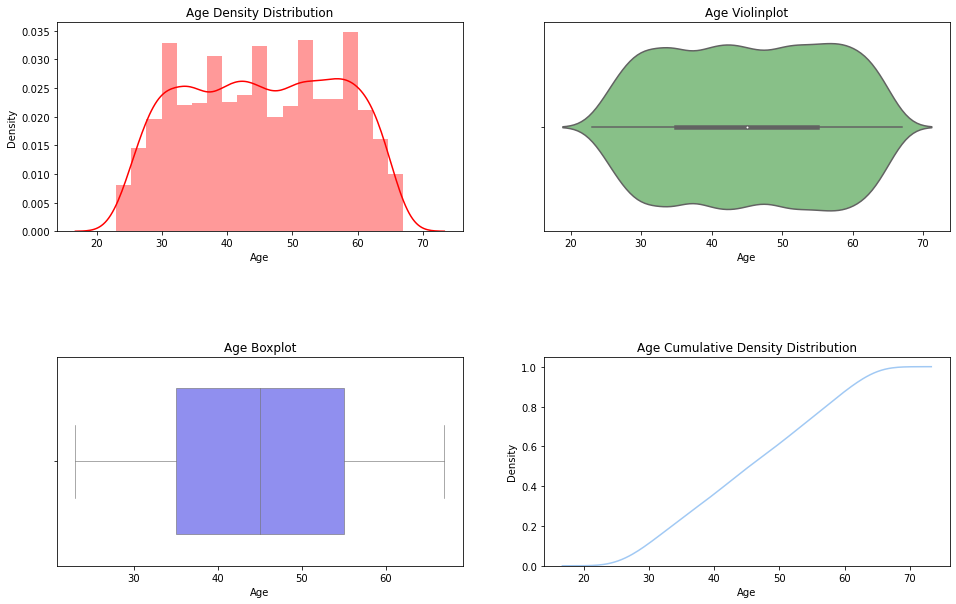

In [18]:
def plott(x):
    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()
    
plott('Age')    

#The age of the customers are  distributed between the Min age of 23 and Max age of 67.

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


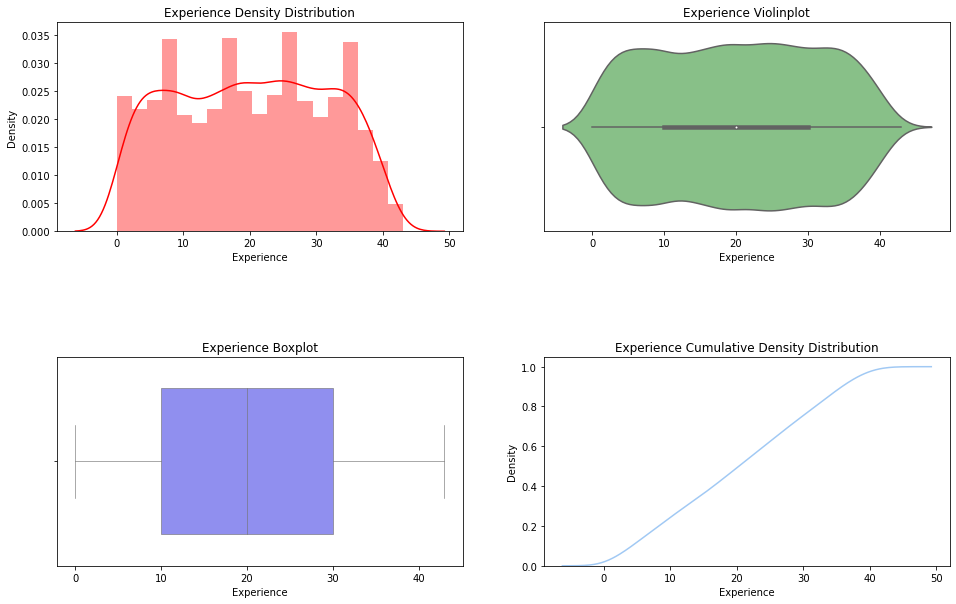

In [19]:
plott('Experience')

The work experience of the customers are  distributed between the Minimum of 0 year and Maximum of 43 year.


C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


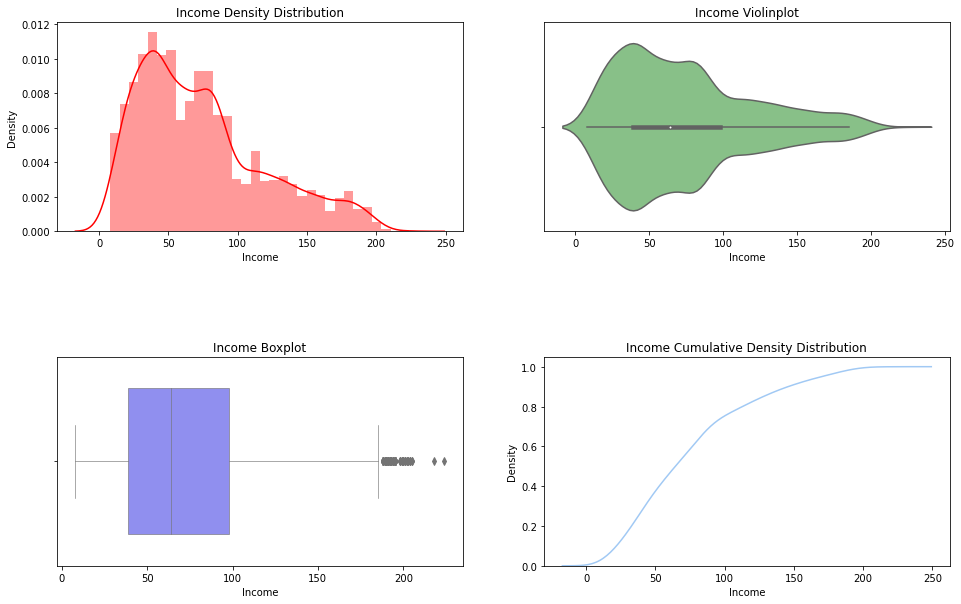

In [20]:
plott('Income')

The income of the customers are skewed to the left .
The Income attribute also has a lot of outlier values.

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


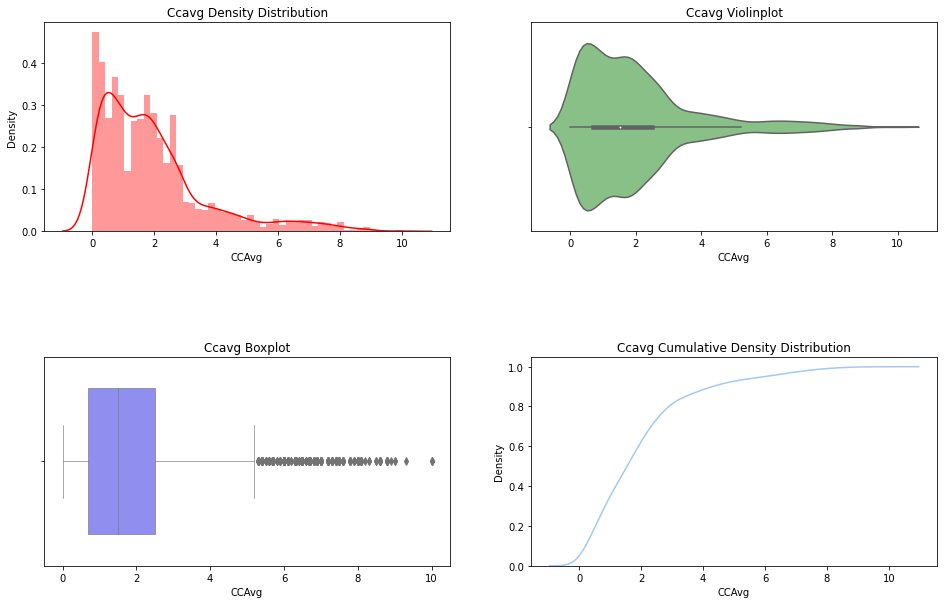

In [21]:
plott('CCAvg')

The Average Monthly Credit Card spending of the customers are skewed heavily to the left, by a lot of outlier values.

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


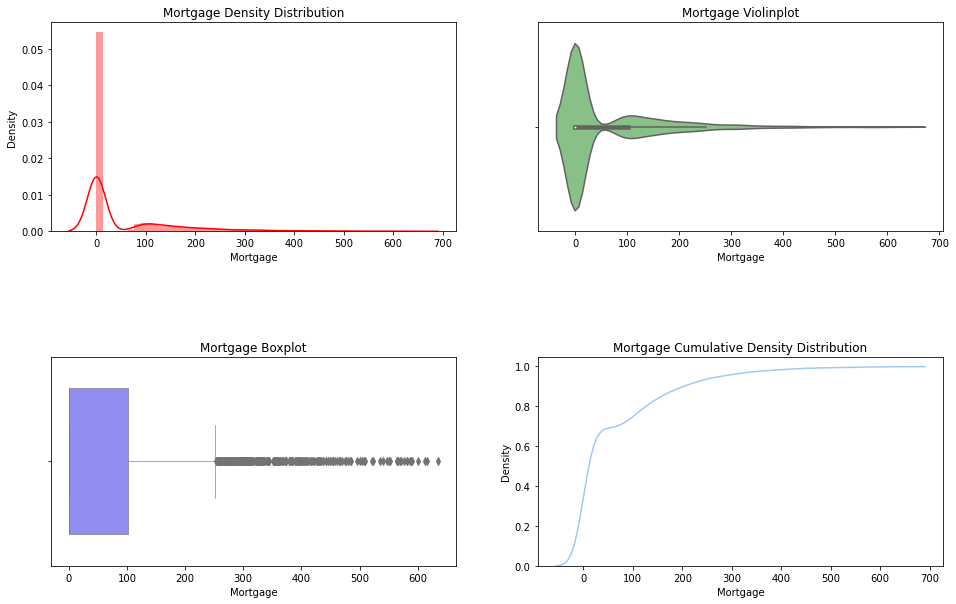

In [22]:
plott('Mortgage')

The Mortgage amount of the customers are skewed heavily to the left, by a lot of outlier values.


 The nature of distribution of numerical columns suggest that we may need to standardize the data before training our models.

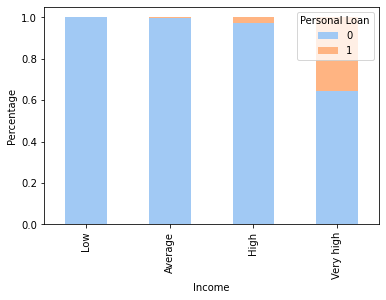

In [23]:
bins=[8,39,64,98,224]
group=['Low','Average','High','Very high']
data['Income_bin']=pd.cut(data['Income'],bins,labels=group)
Income_bin=pd.crosstab(data['Income_bin'],data['Personal Loan'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Income')
P=plt.ylabel('Percentage')

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution')

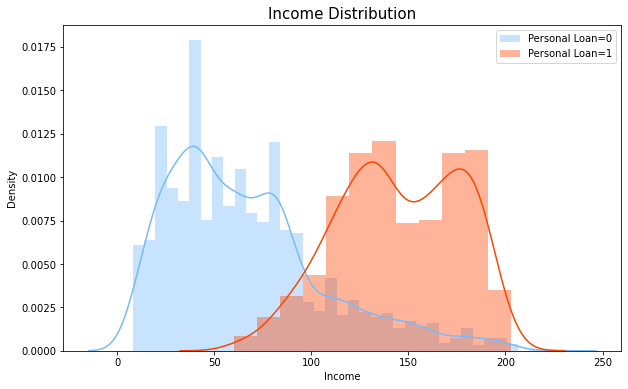

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(data[data["Personal Loan"] == 0]['Income'], color = 'xkcd:sky blue',label='Personal Loan=0',kde=True)
sns.distplot(data[data["Personal Loan"] == 1]['Income'], color = '#FF4500',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Income Distribution", fontsize=15)

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CCAvg Distribution')

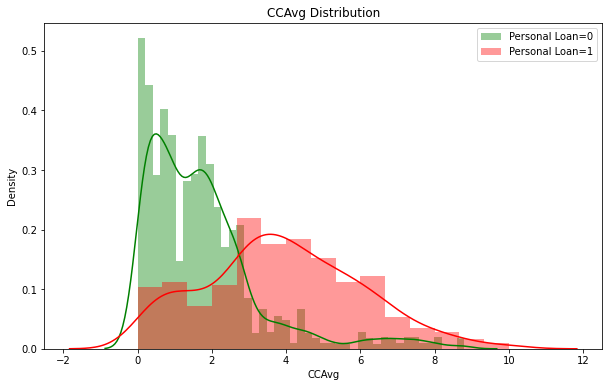

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(data[data["Personal Loan"] == 0]['CCAvg'], color = 'g',label='Personal Loan=0',kde=True)
sns.distplot(data[data["Personal Loan"] == 1]['CCAvg'], color = 'r',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("CCAvg Distribution")

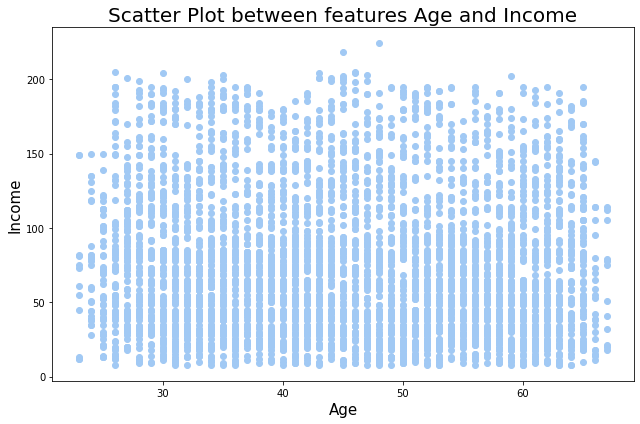

In [26]:
plt.figure(figsize=(9,6))
plt.scatter(x=data["Age"], y=data["Income"])
plt.title("Scatter Plot between features Age and Income", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

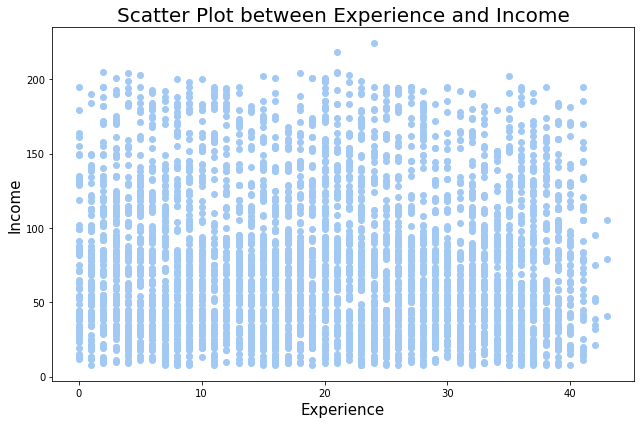

In [27]:
plt.figure(figsize=(9,6))
plt.scatter(x=data["Experience"], y=data["Income"])
plt.title("Scatter Plot between Experience and Income", fontsize=20)
plt.xlabel("Experience", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

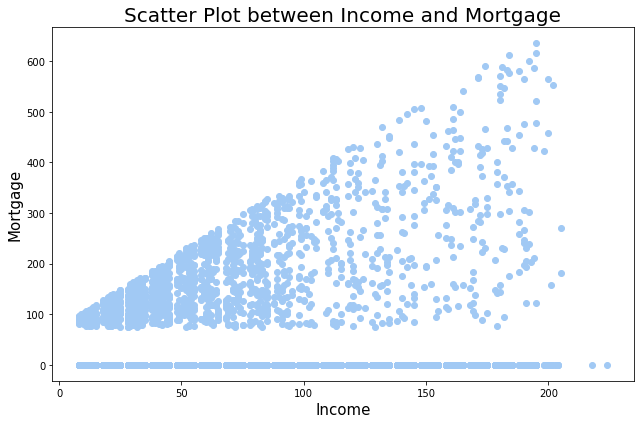

In [28]:
plt.figure(figsize=(9,6))
plt.scatter(x=data["Income"], y=data["Mortgage"])
plt.title("Scatter Plot between Income and Mortgage", fontsize=20)
plt.xlabel("Income", fontsize=15)
plt.ylabel("Mortgage", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

mortgage for the customers increases with increase in their income.

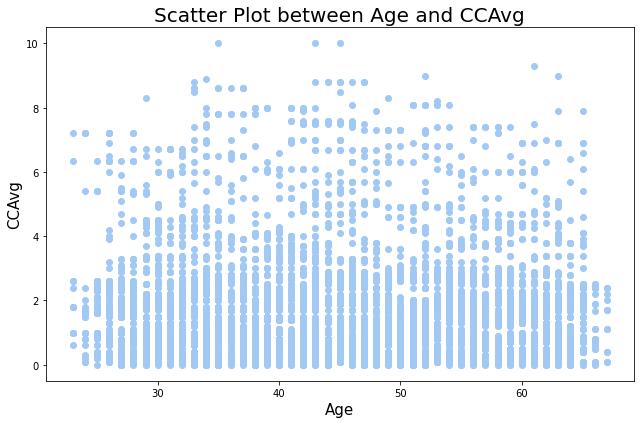

In [29]:
plt.figure(figsize=(9,6))
plt.scatter(x=data["Age"], y=data["CCAvg"])
plt.title("Scatter Plot between Age and CCAvg", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("CCAvg", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

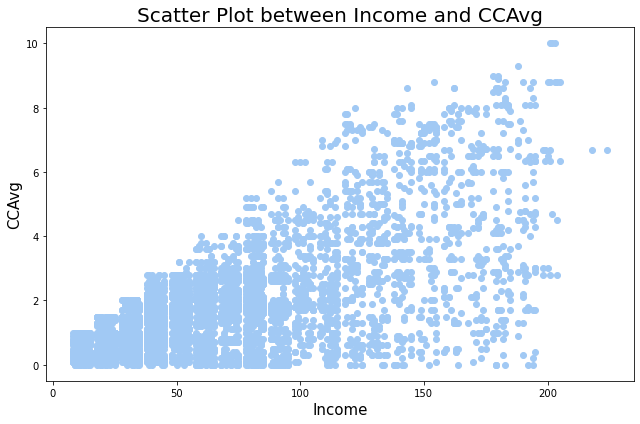

In [30]:
plt.figure(figsize=(9,6))
plt.scatter(x=data["Income"], y=data["CCAvg"])
plt.title("Scatter Plot between Income and CCAvg", fontsize=20)
plt.xlabel("Income", fontsize=15)
plt.ylabel("CCAvg", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

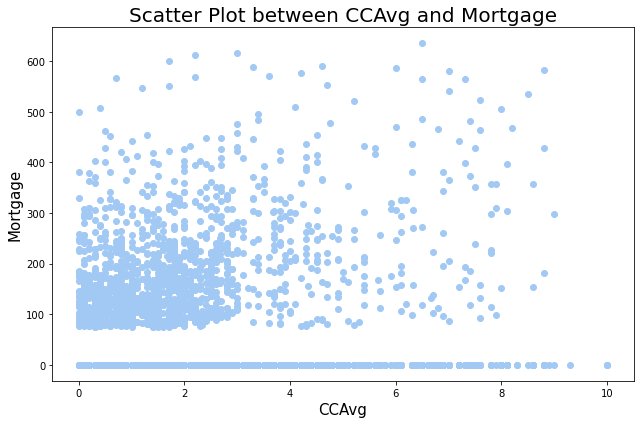

In [31]:
plt.figure(figsize=(9,6))
plt.scatter(x=data["CCAvg"], y=data["Mortgage"])
plt.title("Scatter Plot between CCAvg and Mortgage", fontsize=20)
plt.xlabel("CCAvg", fontsize=15)
plt.ylabel("Mortgage", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

# multivariant analysis

# visualizing every two fearures regarding target featuer

Text(0, 0.5, 'Income')

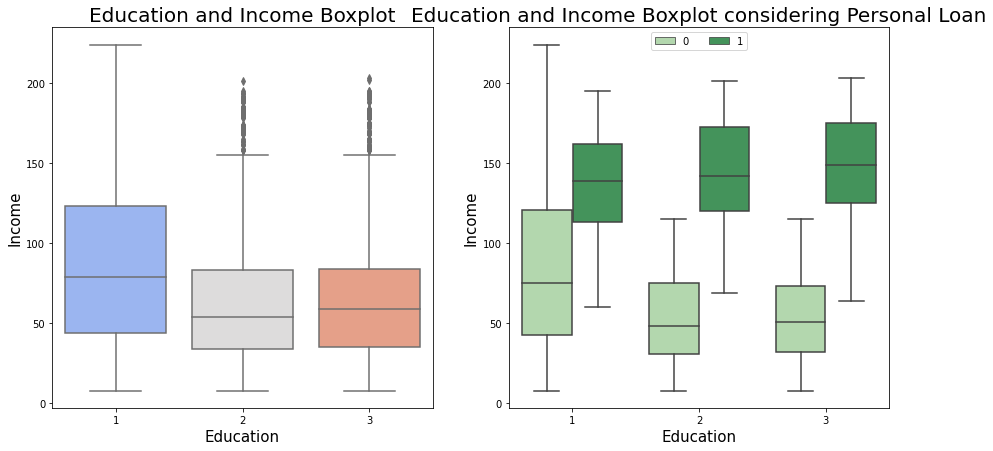

In [32]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Education',  y='Income', data=data, palette="coolwarm")
ax.set_title("Education and Income Boxplot", fontsize=20)
ax.set_xlabel("Education", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Education',  y='Income', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("Education and Income Boxplot considering Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Education", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

Text(0, 0.5, 'Income')

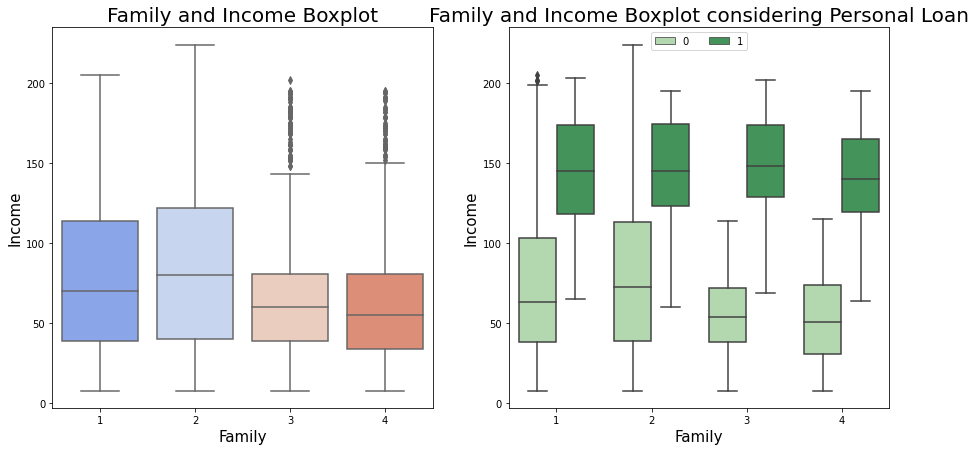

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Family',  y='Income', data=data, palette="coolwarm")
ax.set_title("Family and Income Boxplot", fontsize=20)
ax.set_xlabel("Family", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Family',  y='Income', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("Family and Income Boxplot considering Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Family", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

Text(0, 0.5, 'Income')

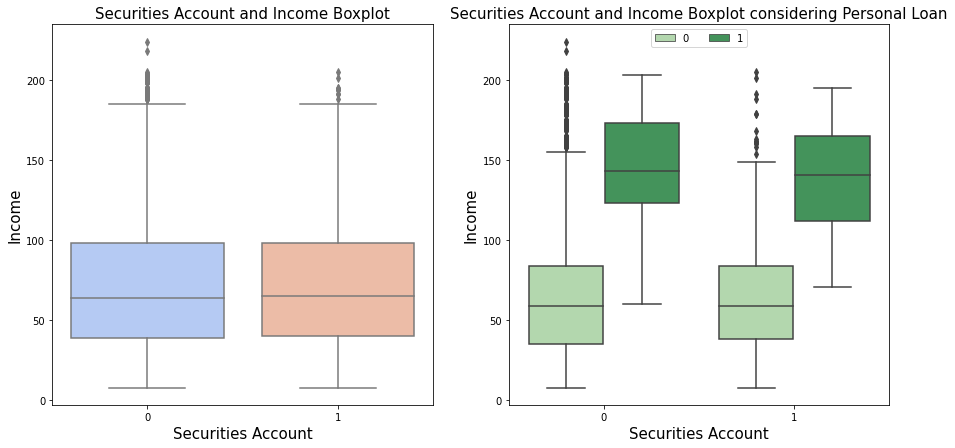

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Securities Account',  y='Income', data=data, palette="coolwarm")
ax.set_title("Securities Account and Income Boxplot", fontsize=15)
ax.set_xlabel("Securities Account", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Securities Account',  y='Income', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("Securities Account and Income Boxplot considering Personal Loan", fontsize=15)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Securities Account", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

Text(0, 0.5, 'Income')

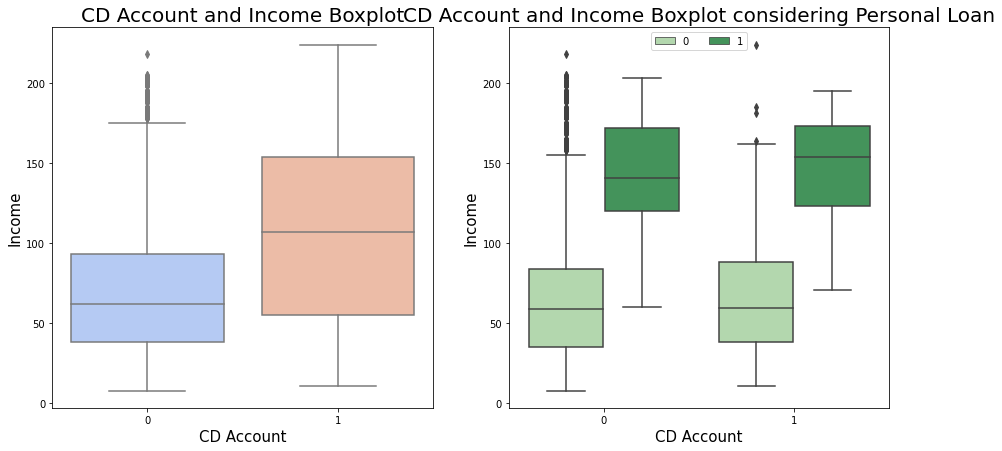

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='CD Account',  y='Income', data=data, palette="coolwarm")
ax.set_title("CD Account and Income Boxplot", fontsize=20)
ax.set_xlabel("CD Account", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='CD Account',  y='Income', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("CD Account and Income Boxplot considering Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("CD Account", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

Text(0, 0.5, 'Income')

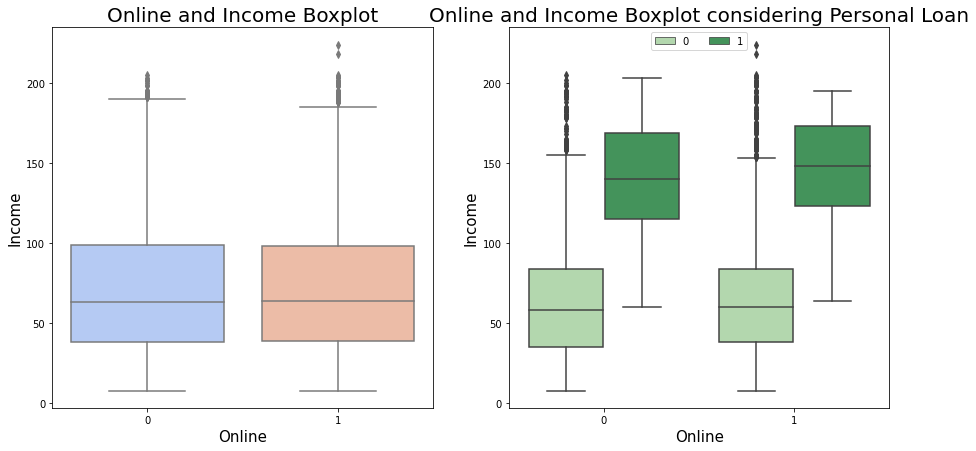

In [36]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Online',  y='Income', data=data, palette="coolwarm")
ax.set_title("Online and Income Boxplot", fontsize=20)
ax.set_xlabel("Online", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Online',  y='Income', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("Online and Income Boxplot considering Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Online", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

Text(0, 0.5, 'Income')

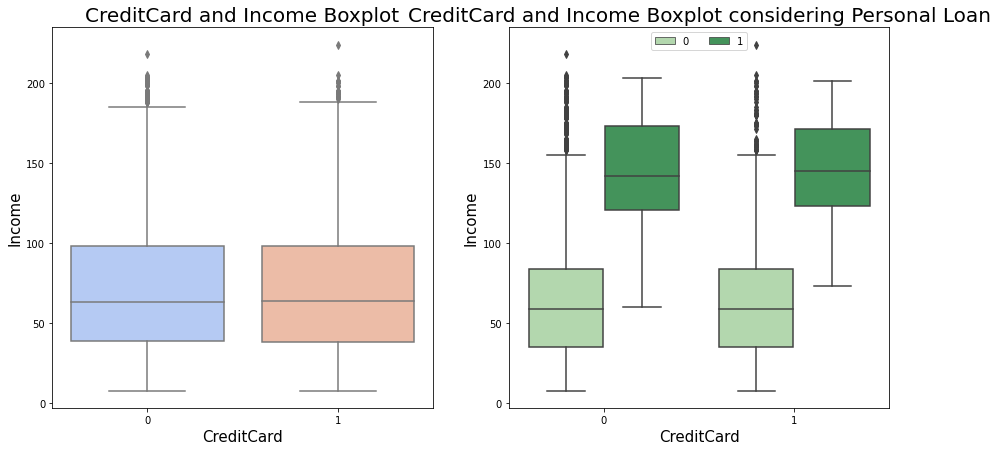

In [37]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='CreditCard',  y='Income', data=data, palette="coolwarm")
ax.set_title("CreditCard and Income Boxplot", fontsize=20)
ax.set_xlabel("CreditCard", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='CreditCard',  y='Income', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("CreditCard and Income Boxplot considering Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("CreditCard", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

Text(0, 0.5, 'CCAvg')

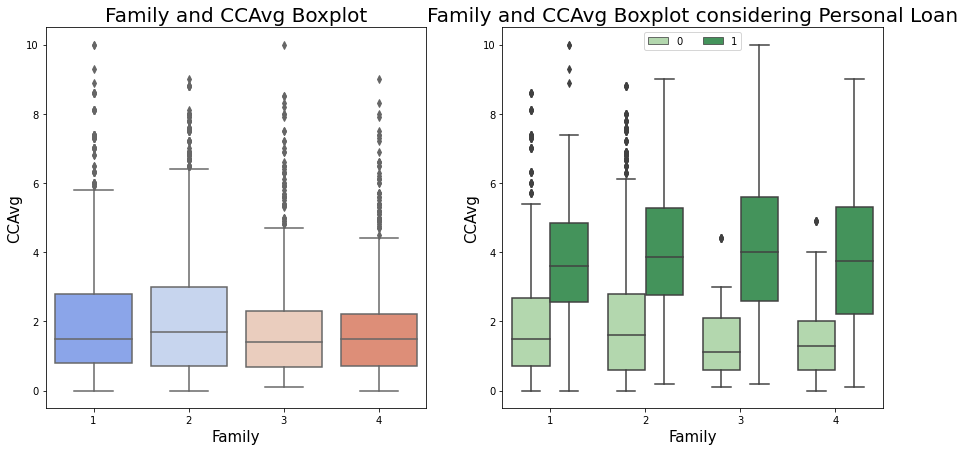

In [38]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Family',  y='CCAvg', data=data, palette="coolwarm")
ax.set_title("Family and CCAvg Boxplot", fontsize=20)
ax.set_xlabel("Family", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Family',  y='CCAvg', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("Family and CCAvg Boxplot considering Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Family", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

Text(0, 0.5, 'CCAvg')

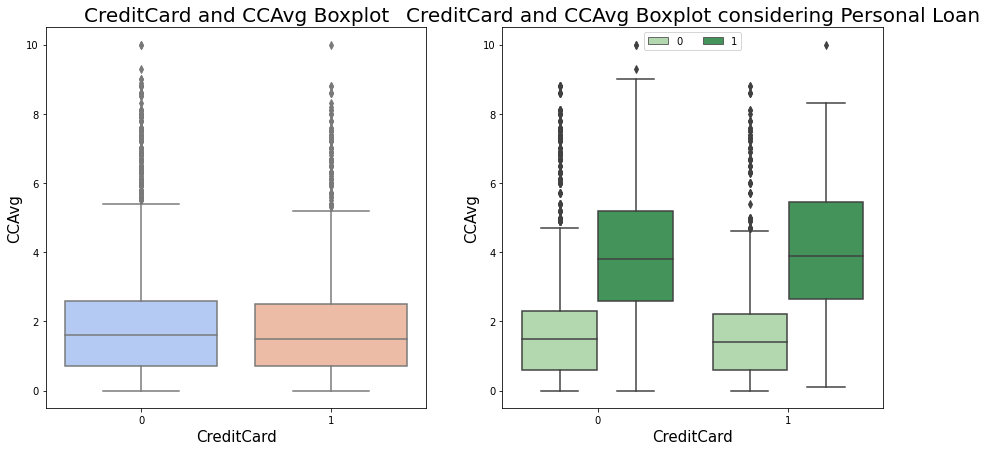

In [39]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='CreditCard',  y='CCAvg', data=data, palette="coolwarm")
ax.set_title("CreditCard and CCAvg Boxplot", fontsize=20)
ax.set_xlabel("CreditCard", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='CreditCard',  y='CCAvg', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("CreditCard and CCAvg Boxplot considering Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("CreditCard", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

Text(0, 0.5, 'CCAvg')

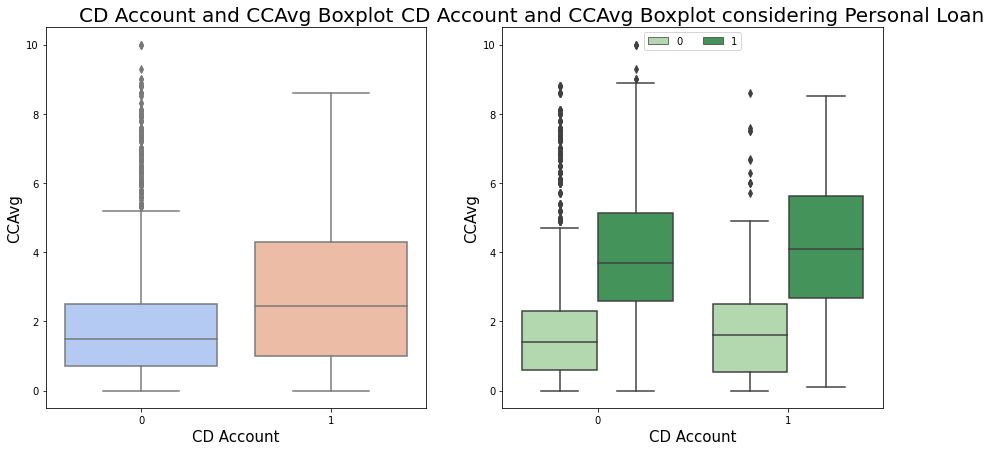

In [40]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='CD Account',  y='CCAvg', data=data, palette="coolwarm")
ax.set_title("CD Account and CCAvg Boxplot", fontsize=20)
ax.set_xlabel("CD Account", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='CD Account',  y='CCAvg', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("CD Account and CCAvg Boxplot considering Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("CD Account", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)


Text(0, 0.5, 'CCAvg')

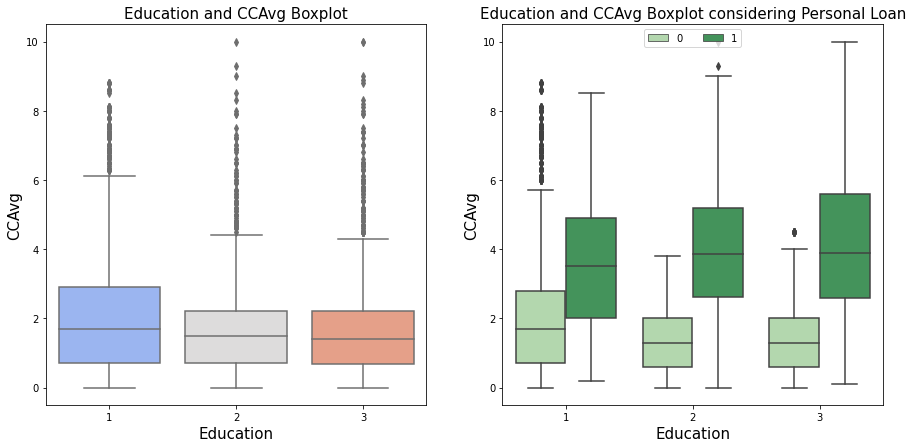

In [41]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Education',  y='CCAvg', data=data, palette="coolwarm")
ax.set_title("Education and CCAvg Boxplot", fontsize=15)
ax.set_xlabel("Education", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Education',  y='CCAvg', hue='Personal Loan', data=data, palette="Greens")
ax1.set_title("Education and CCAvg Boxplot considering Personal Loan", fontsize=15)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Education", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

# Visualizing Independent Categorical Variables

Create a function that returns a Pie chart and a Bar Graph for the following feature:
'Family', 'Education' , 'Securities Account','CD Account', 'Online'

In [42]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def columns_observ(x = 'Education'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    

    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
       
    """
    Draw a Bar Graph on second subplot.
    """
    
    df = pd.pivot_table(data, index = [x], columns = ['Personal Loan'], values = ['Income'], aggfunc = len)

    labels = df.index.tolist()
    loan_no = df.values[:, 0].tolist()
    loan_yes = df.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    rects1 = ax[1].bar(l - width/2, loan_no, width, label='No Loan', color = color1)
    rects2 = ax[1].bar(l + width/2, loan_yes, width, label='Loan', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
          
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

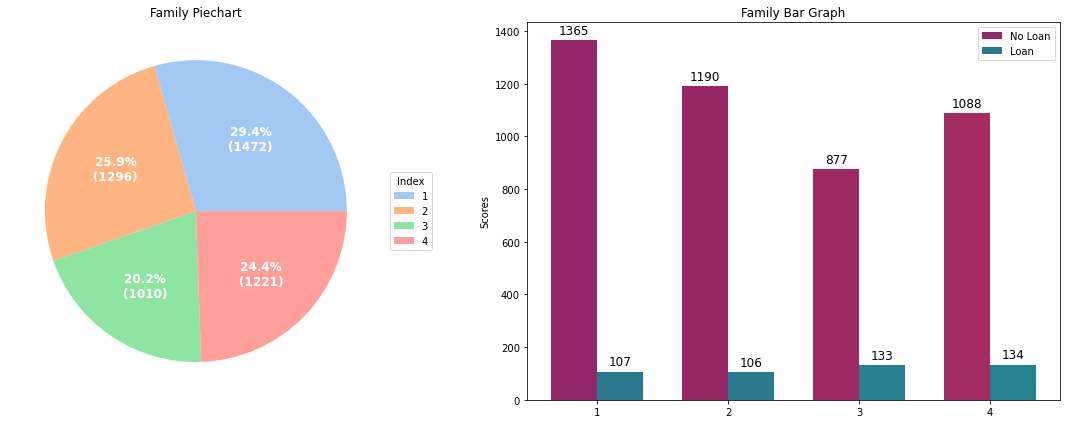

In [43]:
columns_observ('Family')

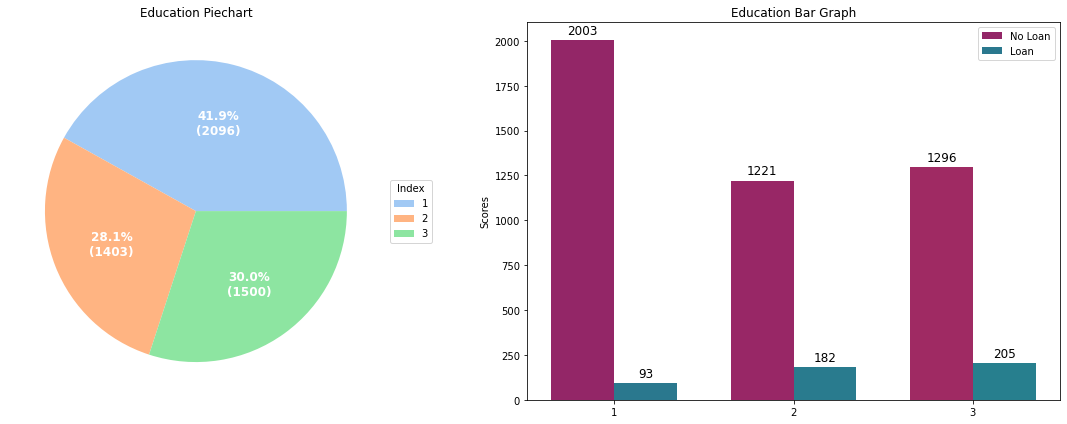

In [44]:
columns_observ('Education')

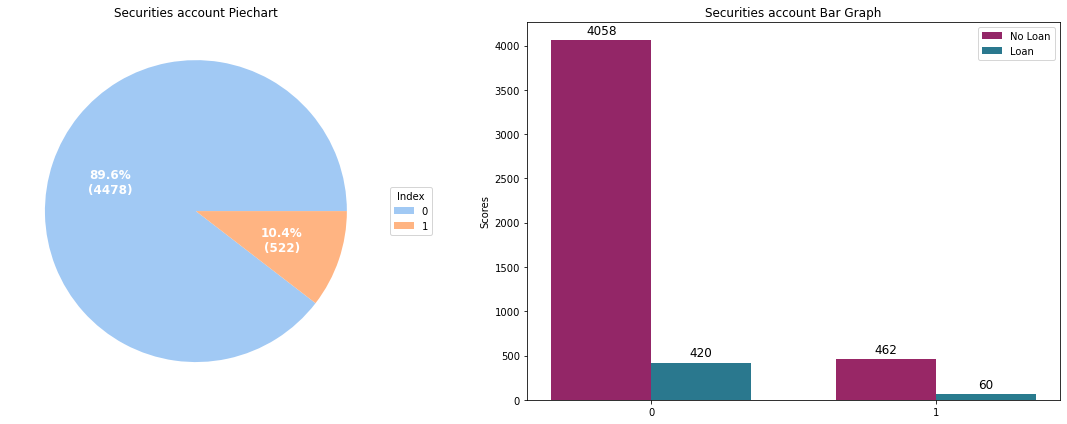

In [45]:
columns_observ('Securities Account')

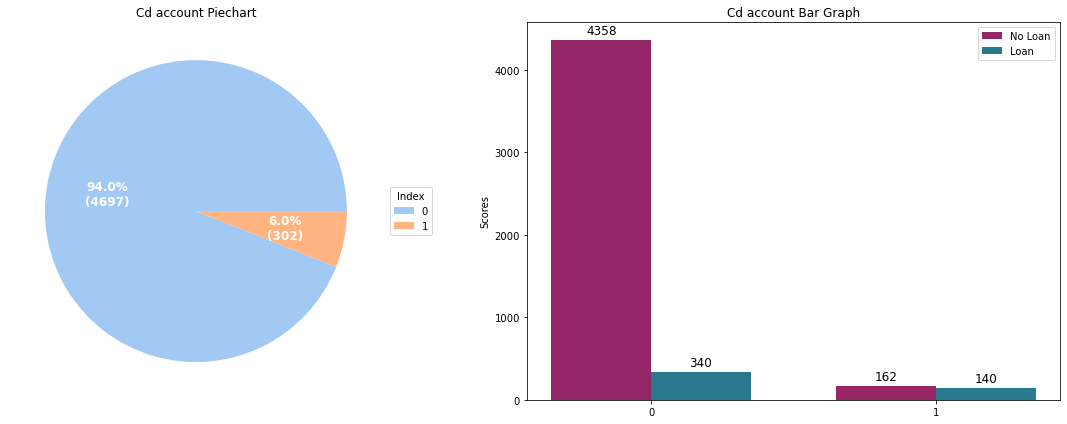

In [46]:
columns_observ('CD Account')

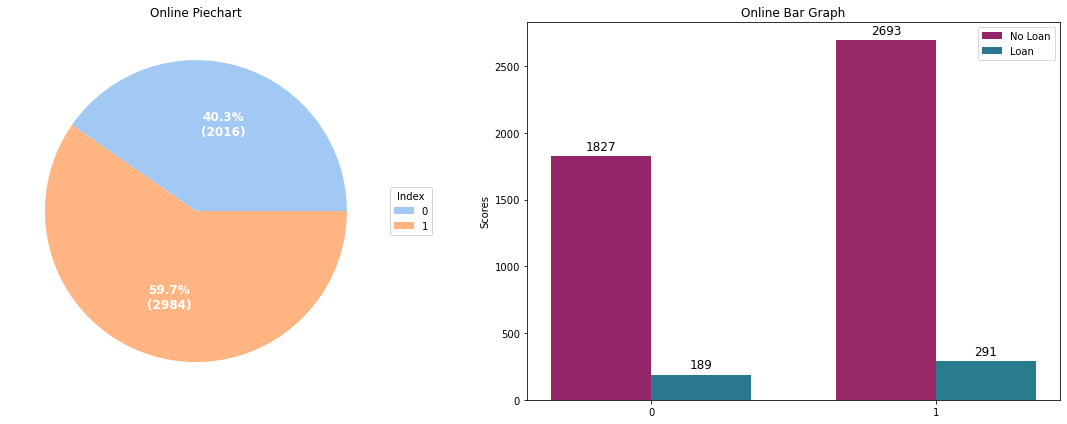

In [47]:
columns_observ('Online')

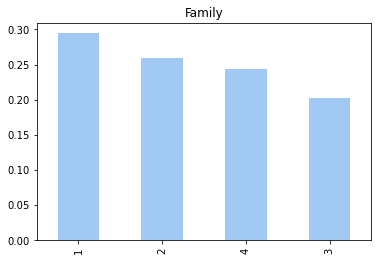

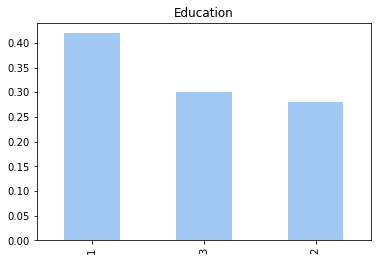

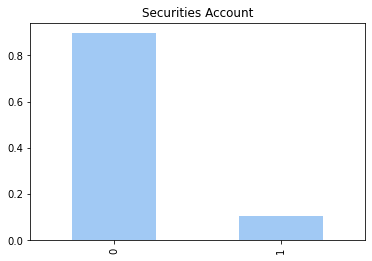

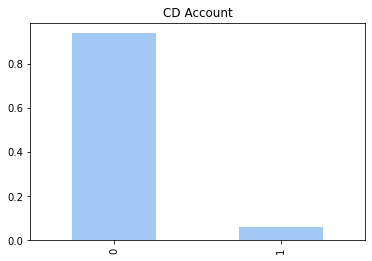

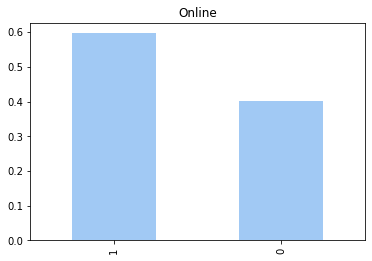

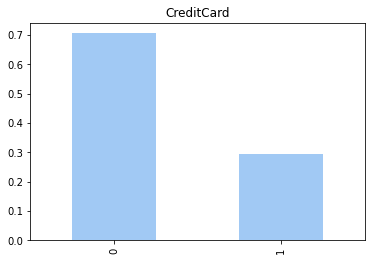

In [48]:
## continue Visualizing Independent Categorical Variables

data['Family'].value_counts(normalize=True).plot.bar(title='Family')
plt.show()
data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
data['Securities Account'].value_counts(normalize=True).plot.bar(title='Securities Account')
plt.show()
data['CD Account'].value_counts(normalize=True).plot.bar(title='CD Account')
plt.show()
data['Online'].value_counts(normalize=True).plot.bar(title='Online')
plt.show()
data['CreditCard'].value_counts(normalize=True).plot.bar(title='CreditCard')
plt.show()

# It can be inferred from the above plots that:

# Target Variable Distribution:

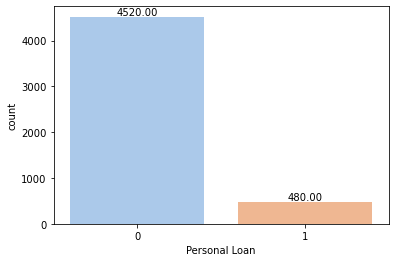

In [49]:
splot = sns.countplot(x = 'Personal Loan', data = data)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

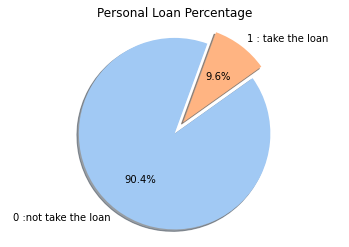

In [50]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(data["Personal Loan"].value_counts(), explode=explode, labels=["0 :not take the loan", "1 : take the loan"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

There is a clear imbalance which needs to be dealt with during modelling. 

From the above plot we can observe that our dataset is highly imbalanced.


Majority of the data points belong to 0 class. Ratio of 0 class to 1 class is 8:1.

Out of the 5000 bank customers only 480 customers take the personal loan ehich is  9.6% . 


<AxesSubplot:>

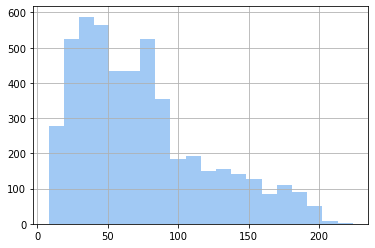

In [51]:
data['Income'].hist(bins=20)

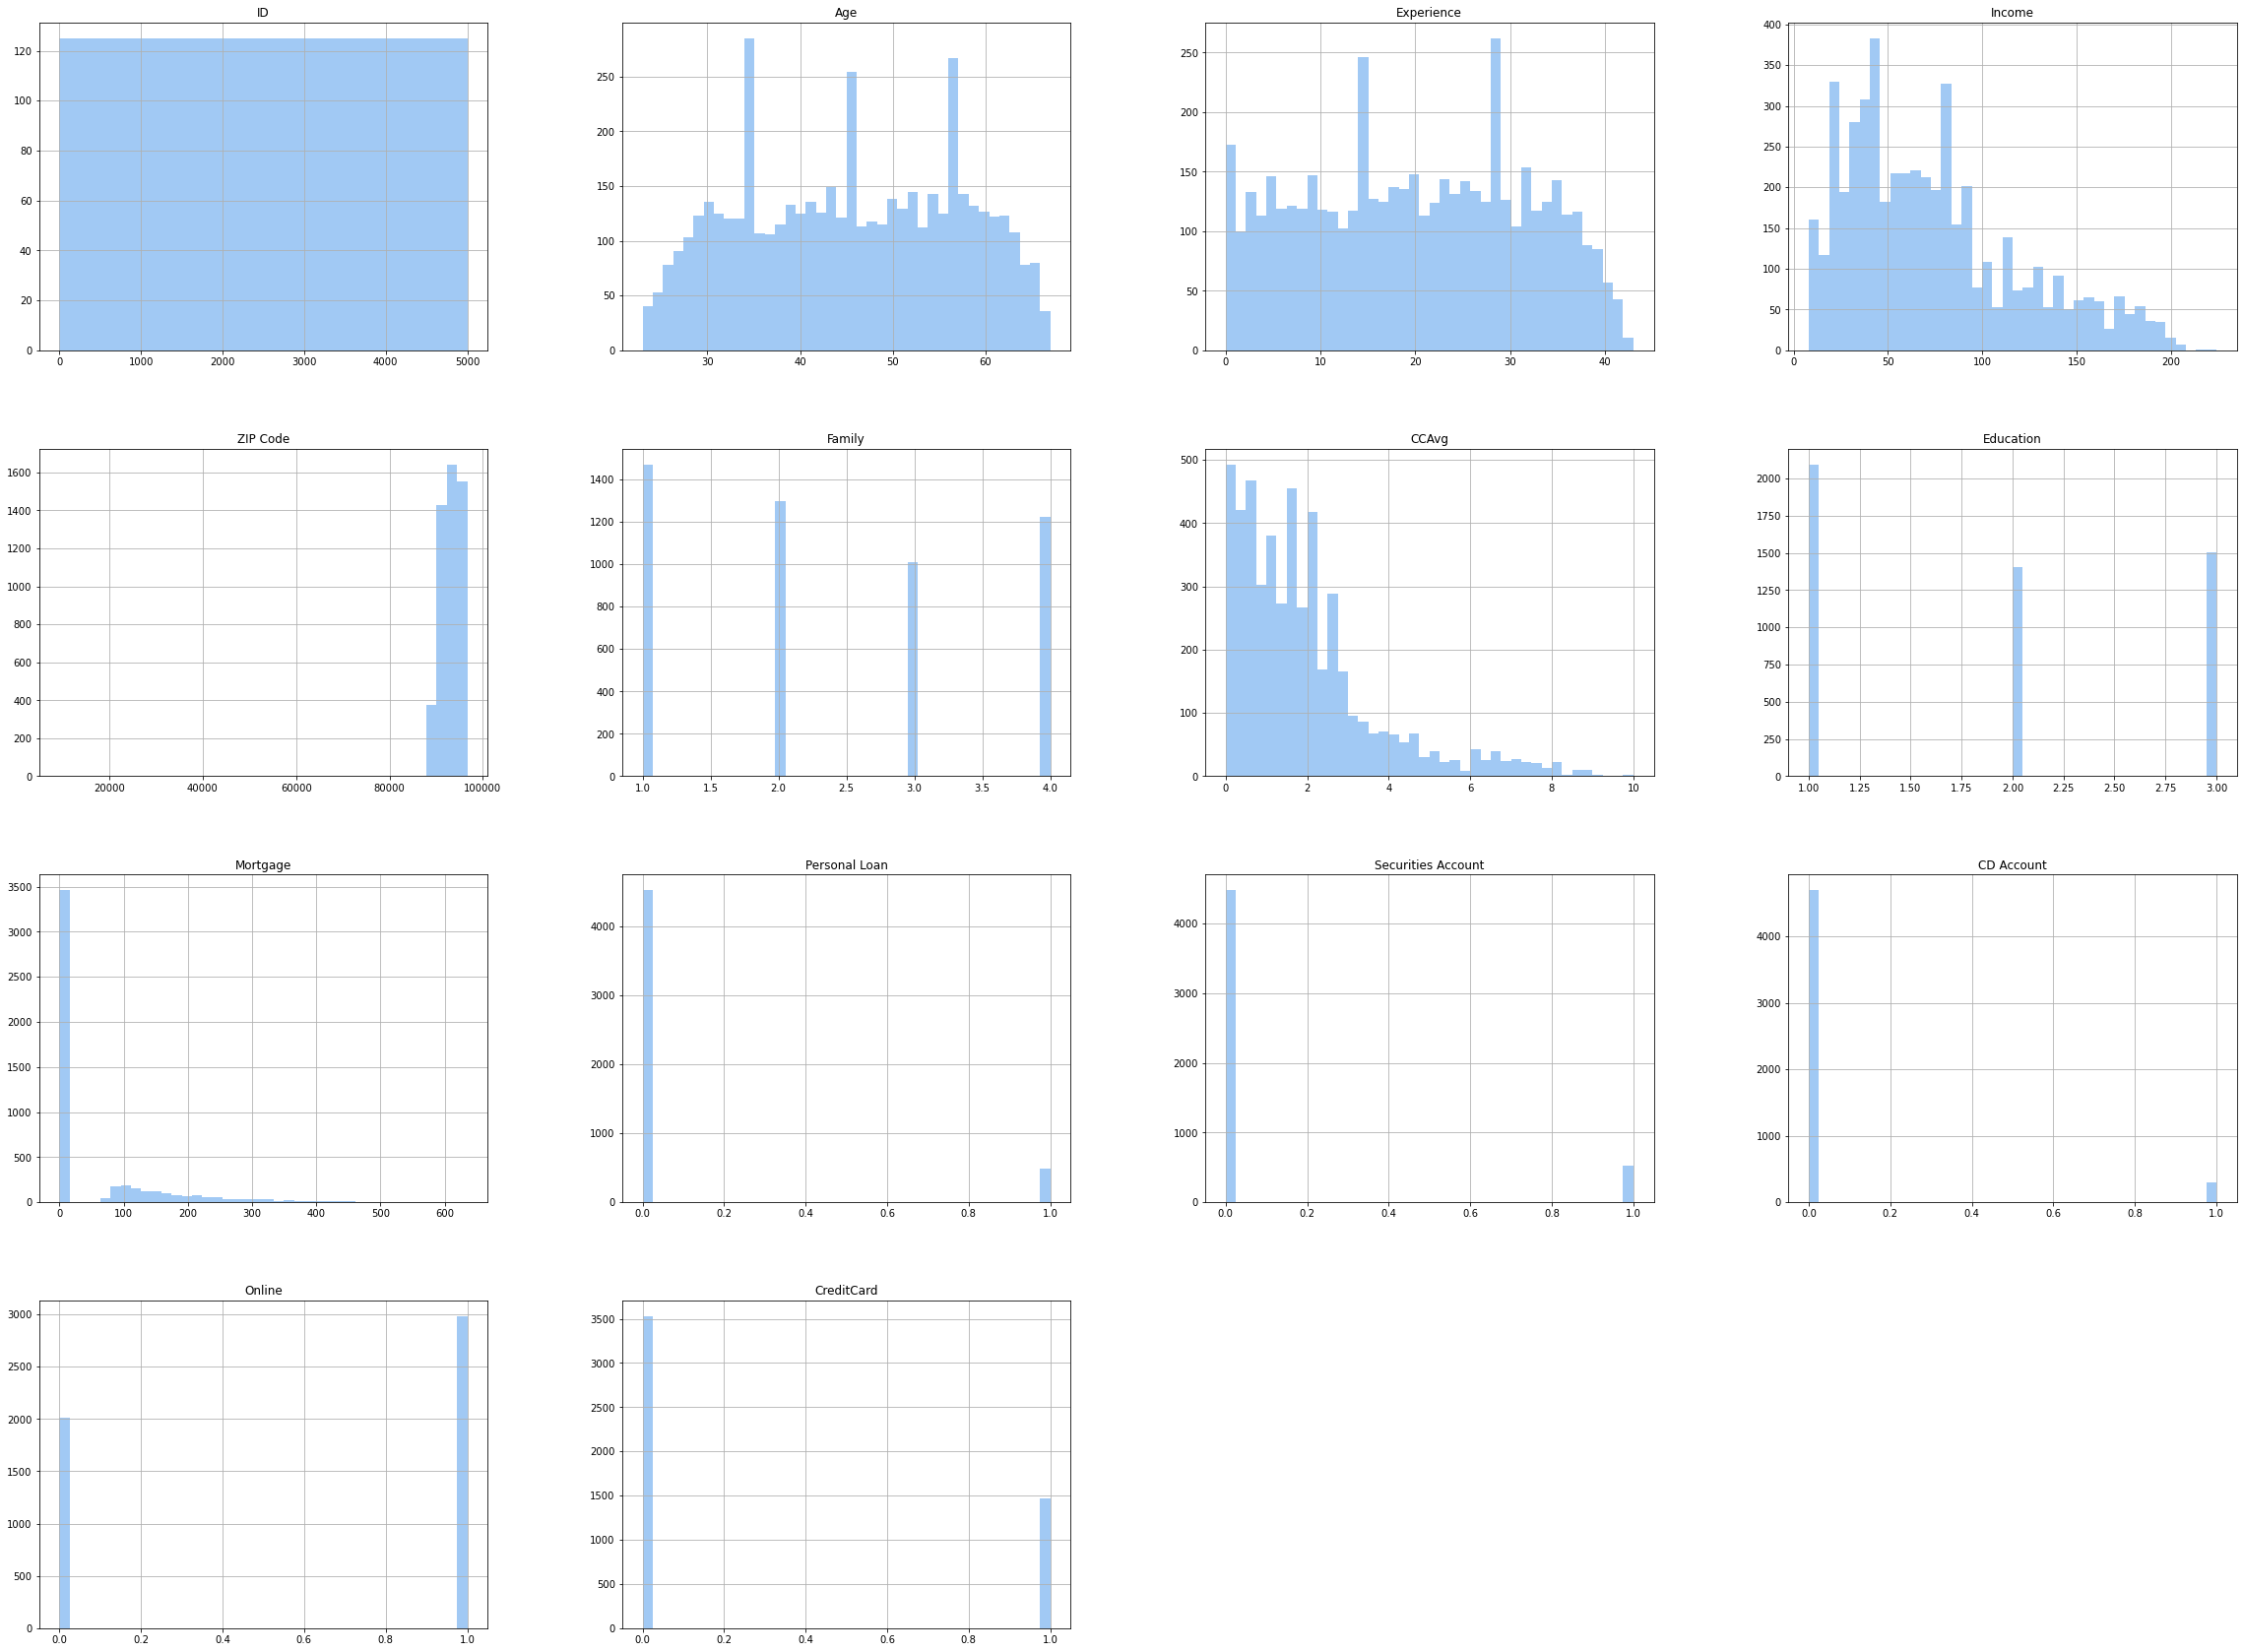

In [52]:
data.hist(bins = 40, figsize = (40,30))
plt.show()

Through these histograms we can see that some of them are clearly right skewed and we should normalize

<AxesSubplot:title={'center':'Income'}, xlabel='Education'>

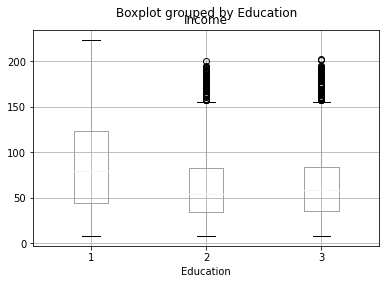

In [53]:
data.boxplot(column='Income',by='Education')

##
We see that a lot of categorical columns are being treated as integer datatypes. We'd like to consider which columns 
are really numeric and Dividing the columns in the dataset in to numeric and non numeric for our analysis.

In [54]:
cols = set(data.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
data_num = data[cols_numeric]

In [55]:
data_num

,Experience,Income,CCAvg,Mortgage,Age
0,1,49,1.6,0,25
1,19,34,1.5,0,45
2,15,11,1.0,0,39
3,9,100,2.7,0,35
4,8,45,1.0,0,35
...,...,...,...,...,...
4995,3,40,1.9,0,29
4996,4,15,0.4,85,30
4997,39,24,0.3,0,63
4998,40,49,0.5,0,65


#  Multivariate Analysis

In [56]:
X = data.drop('Personal Loan', axis = 1)
Y = data[['Personal Loan']]

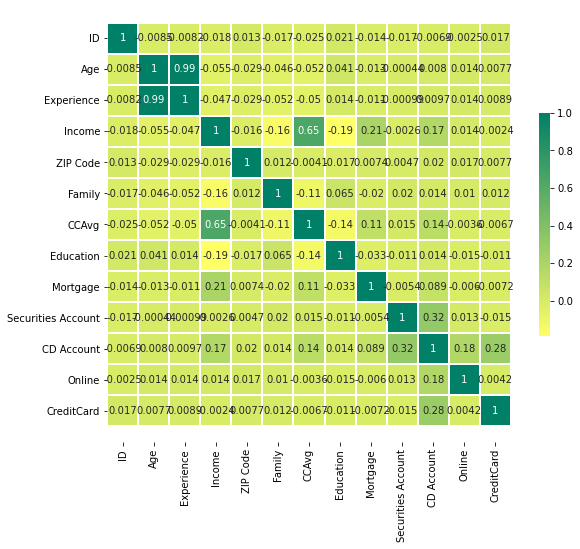

In [57]:
corr = X.corr()
plt.figure(figsize=(10, 8))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

We see there is a very strong positive correlation between Age and Work Experience, which is expected.

There is also a positive correlation between Income and Credit Card spending.

Now plotting all Dependent variables to see their inter-relations

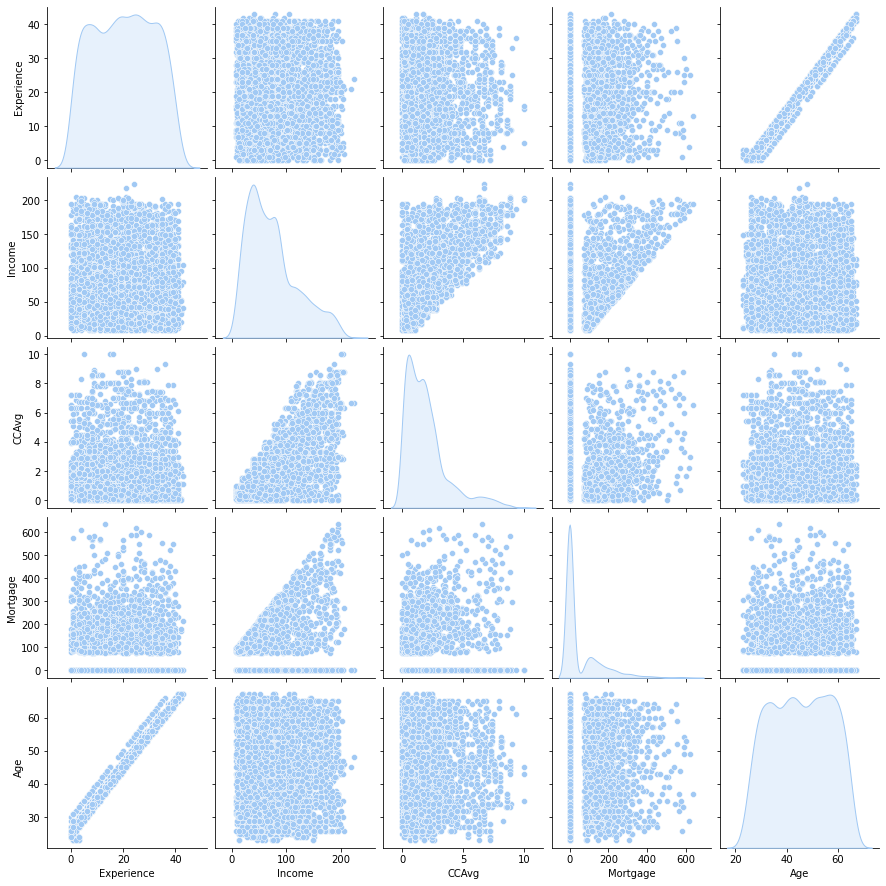

In [58]:
sns.pairplot(X, diag_kind = 'kde', vars = list(data_num.columns))

# Outlier Treatment

 LOG TRANFORMATION OF MORTGAGE ::

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Mortgage Distribution after First Logharitmic Transformation')

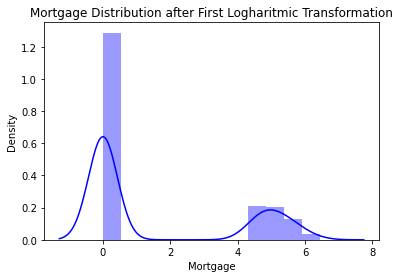

In [59]:
log_Mortgage1 = np.log1p(data["Mortgage"])
sns.distplot(log_Mortgage1, color ="b")
plt.title("Mortgage Distribution after First Logharitmic Transformation")

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Mortgage Distribution after Second logarithmic Transformation :')

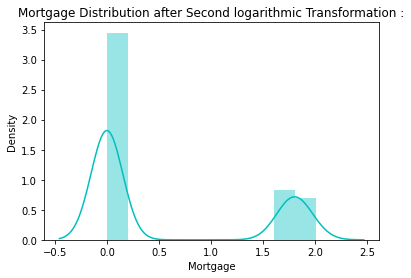

In [61]:
log_Mortgage2 = np.log1p(log_Mortgage1)
sns.distplot(log_Mortgage2, color ="c")
plt.title("Mortgage Distribution after Second logarithmic Transformation :")

# so:

In [63]:
data["Mortgage"] = log_Mortgage2

Income:

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution after Logarithmic Transformation is :')

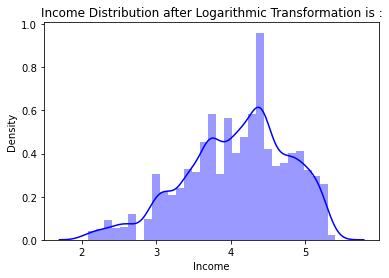

In [64]:
log_Income1 = np.log(data["Income"])
sns.distplot(log_Income1, color ="b")
plt.title("Income Distribution after Logarithmic Transformation is :")

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution after Second Logarithmic Transformation is:')

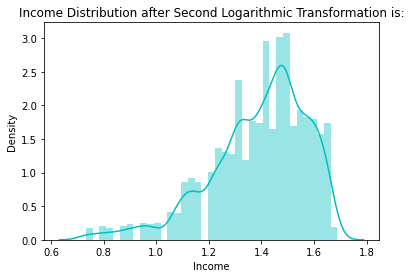

In [65]:
log_Income2 = np.log(log_Income1)
sns.distplot(log_Income2, color ="c")
plt.title("Income Distribution after Second Logarithmic Transformation is:")

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sama\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


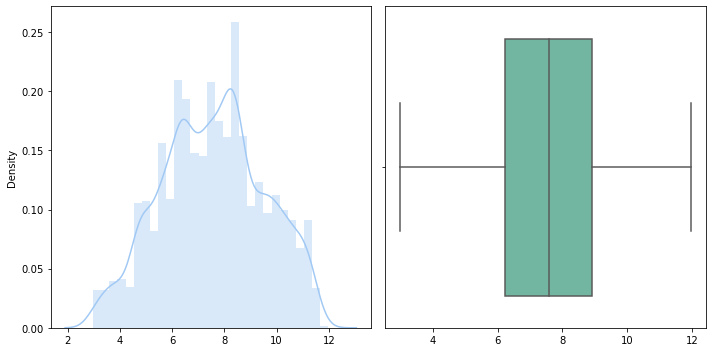

In [66]:
from sklearn.preprocessing import PowerTransformer
po_tr = PowerTransformer(method="yeo-johnson", standardize=False)
po_tr.fit(data["Income"].values.reshape(-1, 1))

income2 =po_tr.transform(data["Income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(income2, ax=axes[0])
sns.boxplot(income2, orient="v", palette="Set2", ax=axes[1])
plt.tight_layout()

In [67]:
# from now we use temp_income insted of income
data['Income'] = income2

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sama\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


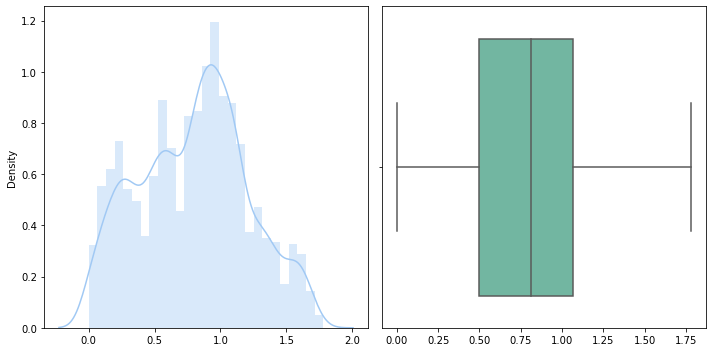

In [68]:
from sklearn.preprocessing import PowerTransformer
po_tr = PowerTransformer(method="yeo-johnson", standardize=False)
po_tr.fit(data["CCAvg"].values.reshape(-1, 1))

ccavg2 = po_tr.transform(data["CCAvg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ccavg2, ax=axes[0])
sns.boxplot(ccavg2, orient="v", palette="Set2", ax=axes[1])
plt.tight_layout()

In [69]:
data['CCAvg'] = ccavg2

# removing features:age , zip , id

In [70]:
data1 = data.drop(['ID', 'Age', 'ZIP Code'], axis=1)

In [71]:
col_names = ['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

In [72]:
data1 = data1.loc[:,col_names]

In [73]:
data1.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,6.827583,4,0.845160,1,0.0,1,0,0,0,0
1,19,5.876952,3,0.814478,1,0.0,1,0,0,0,0
2,15,3.504287,1,0.633777,1,0.0,0,0,0,0,0
3,9,8.983393,1,1.107427,2,0.0,0,0,0,0,0
4,8,6.597314,4,0.633777,2,0.0,0,0,0,1,0


In [74]:
X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0,1,2,3,4,5]] = sc.fit_transform(X_train[:, [0,1,2,3,4,5]])
X_test[:, [0,1,2,3,4,5]] = sc.transform(X_test[:, [0,1,2,3,4,5]])

#  Models:

### LOGISTIC REGRESSION

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [78]:
y_pred_logreg = logreg.predict(X_test)

#### CONFUSION MATRIX

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [80]:
print("Accuracy:"),metrics.accuracy_score(y_test,y_pred_logreg)

Accuracy:


(None, 0.95)

In [81]:
confusion_matrix(y_test,y_pred_logreg)

array([[886,  14],
       [ 36,  64]], dtype=int64)

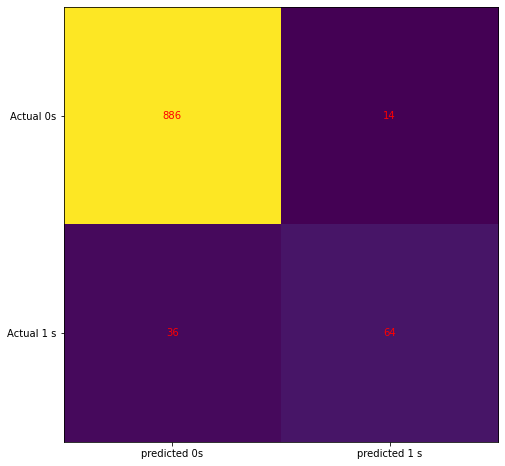

In [82]:
cm=confusion_matrix(y_test,y_pred_logreg)

fig , ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s','predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1 s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha='center' , va='center', color= 'red' )
plt.show()        

In [83]:
from sklearn.metrics import precision_score, recall_score
print (classification_report(y_test,y_pred_logreg))
print("Accuracy Score : ", accuracy_score(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.82      0.64      0.72       100

    accuracy                           0.95      1000
   macro avg       0.89      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy Score :  0.95


In [84]:
l_probs = [0 for _ in range(len(y_test))]
logis_probs = logreg.predict_proba(X_test)
logis_probs = logis_probs[:, 1]
l_auc = roc_auc_score(y_test, l_probs)
logis_auc = roc_auc_score(y_test, logis_probs)
print('Logistic Regression: AUROC = %.3f' % (logis_auc))

Logistic Regression: AUROC = 0.952


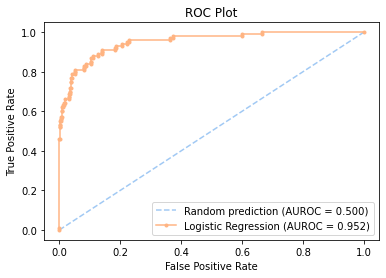

In [85]:
l_fpr, l_tpr, _ = roc_curve(y_test, l_probs)
logis_fpr, logis_tpr, _ = roc_curve(y_test, logis_probs)
plt.plot(l_fpr, l_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % l_auc)
plt.plot(logis_fpr, logis_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logis_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Using  SMOTE :

In [86]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: 380 
Label 0, Before using SMOTE: 3620 


In [87]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [88]:
smt = SMOTE(random_state=12)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [90]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_smt==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_smt==0)))

Label 1, After using SMOTE: 3620
Label 0, After using SMOTE: 3620


In [92]:
logreg_sm = LogisticRegression(random_state = 0, solver='lbfgs')
logreg_sm.fit(X_train_smt, y_train_smt)

LogisticRegression(random_state=0)

In [93]:
y_pred_logreg_smt = logreg_sm.predict(X_test)

### CONFUSION MATRIX

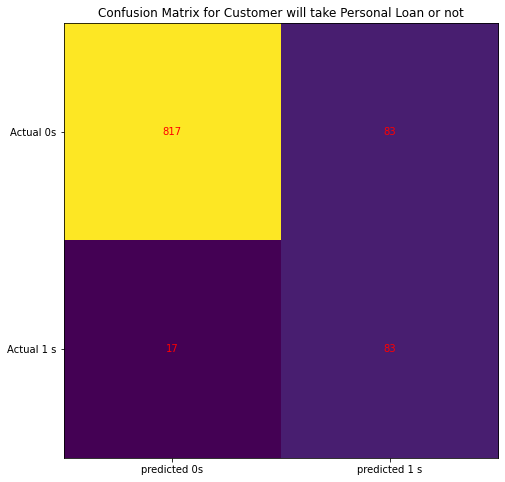

In [96]:
cm=confusion_matrix(y_test,y_pred_logreg_smt)

fig , ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s','predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1 s'))
ax.set_ylim(1.5,-0.5)
plt.title("Confusion Matrix for Customer will take Personal Loan or not")
for i in range(2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha='center' , va='center', color= 'red' )
plt.show()        

### MODEL EVALUATION  after using SMOTE on Logestic Regression

In [97]:
print (classification_report(y_test, y_pred_logreg_smt))
print("Accuracy Score : ", accuracy_score(y_test,y_pred_logreg_smt))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       900
           1       0.50      0.83      0.62       100

    accuracy                           0.90      1000
   macro avg       0.74      0.87      0.78      1000
weighted avg       0.93      0.90      0.91      1000

Accuracy Score :  0.9


In [98]:
l_probs = [0 for _ in range(len(y_test))]
logis_probs = logreg_sm.predict_proba(X_test)
logis_probs = logis_probs[:, 1]
l_auc = roc_auc_score(y_test, l_probs)
logis_auc = roc_auc_score(y_test, logis_probs)
print('Logistic Regression: AUROC = %.3f' % (logis_auc))

Logistic Regression: AUROC = 0.952


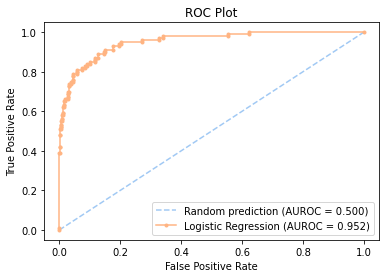

In [99]:
l_fpr, l_tpr, _ = roc_curve(y_test, l_probs)
logis_fpr, logis_tpr, _ = roc_curve(y_test, logis_probs)
plt.plot(l_fpr, l_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % l_auc)
plt.plot(logis_fpr, logis_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logis_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## analysis after using  SMOTE on Logestic Regression

the Recall has improved than before as it became 0.83, but the performance of the overall model didn't improved after using SMOTE technique on Logestic Regression. even the accuracy become less for Logistic Regression with SMOTE. The precision decreased to 0.5 and f1 score also decreased.

# NAive Bayes

In [134]:
from sklearn.naive_bayes import BernoulliNB


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [136]:
X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0,1,2,3,4,5]] = sc.fit_transform(X_train[:, [0,1,2,3,4,5]])
X_test[:, [0,1,2,3,4,5]] = sc.transform(X_test[:, [0,1,2,3,4,5]])

In [138]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [139]:
y_pred_BL = clf.predict(X_test)

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [142]:
print("naive Accuracy:"),metrics.accuracy_score(y_test,y_pred_BL )

naive Accuracy:


(None, 0.917)

In [143]:
confusion_matrix(y_test,y_pred_BL )

array([[890,  10],
       [ 73,  27]], dtype=int64)

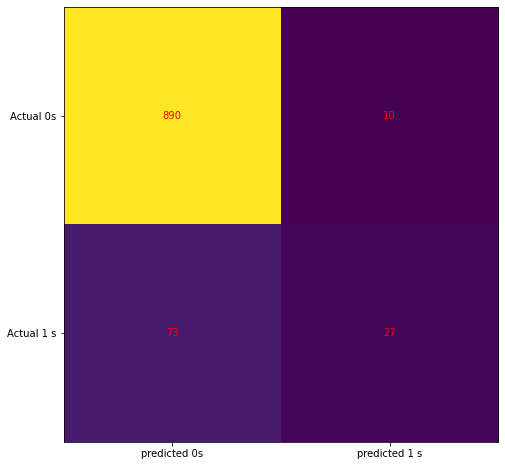

In [144]:
cm=confusion_matrix(y_test,y_pred_BL )

fig , ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s','predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1 s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha='center' , va='center', color= 'red' )
plt.show()        

In [145]:
print (classification_report(y_test, y_pred_BL))
print("Accuracy Score NB: ", accuracy_score(y_test,y_pred_BL))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       900
           1       0.73      0.27      0.39       100

    accuracy                           0.92      1000
   macro avg       0.83      0.63      0.67      1000
weighted avg       0.90      0.92      0.90      1000

Accuracy Score NB:  0.917


In [146]:
l_probs = [0 for _ in range(len(y_test))]
NB_probs = clf.predict_proba(X_test)
NB_probs = NB_probs[:, 1]
l_auc = roc_auc_score(y_test, l_probs)
NB_auc = roc_auc_score(y_test, NB_probs)
print('naive bayes: AUROC = %.3f' % (logis_auc))

naive bayes: AUROC = 0.952


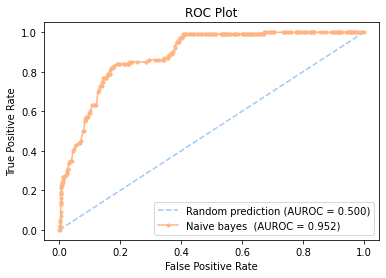

In [147]:
l_fpr, l_tpr, _ = roc_curve(y_test, l_probs)
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_probs)
plt.plot(l_fpr, l_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % l_auc)
plt.plot(NB_fpr, NB_tpr, marker='.', label='Naive bayes  (AUROC = %0.3f)' % logis_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Naive bayes with SMOTE ANALYSIS

In [148]:
clf_smt = BernoulliNB()
clf_smt.fit(X_train_smt, y_train_smt)

BernoulliNB()

In [150]:
y_pred_NB_smt = clf_smt.predict(X_test)

In [151]:
confusion_matrix(y_test,y_pred_NB_smt )

array([[713, 187],
       [ 19,  81]], dtype=int64)

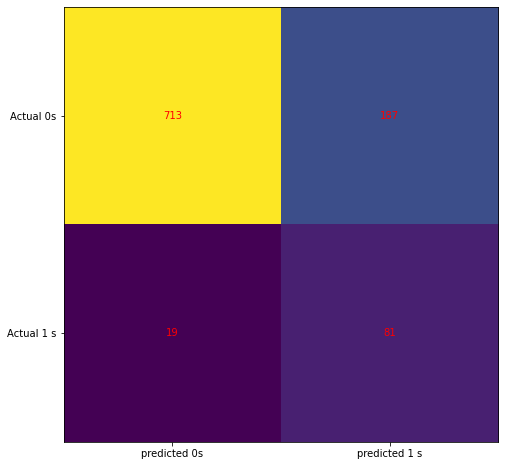

In [152]:
cm=confusion_matrix(y_test,y_pred_NB_smt )

fig , ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s','predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1 s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha='center' , va='center', color= 'red' )
plt.show()        

In [153]:
print (classification_report(y_test, y_pred_NB_smt))
print("Accuracy Score NB: ", accuracy_score(y_test,y_pred_NB_smt))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       900
           1       0.30      0.81      0.44       100

    accuracy                           0.79      1000
   macro avg       0.64      0.80      0.66      1000
weighted avg       0.91      0.79      0.83      1000

Accuracy Score NB:  0.794


### the accuracy  of NB is reduced after using Smote

In [158]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

KFold=KFold(5)
print(cross_val_score(clf,X,y,cv=KFold ,n_jobs=1))

[0.891 0.899 0.887 0.903 0.9  ]


##### After dedicating diffrent amount of K we see no need to remove any bad folder

In [201]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf.predict(X_test)

In [202]:
print("Guasian Accuracy:"),metrics.accuracy_score(y_test,y_pred_nb )

Guasian Accuracy:


(None, 0.895)

# KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [165]:
K=3
clf_KN=KNeighborsClassifier(K)
clf_KN.fit(X_train,y_train)
y_pred_kn=clf_KN.predict(X_test)

In [166]:
print("Accuracy:"),metrics.accuracy_score(y_test,y_pred_kn)

Accuracy:


(None, 0.948)

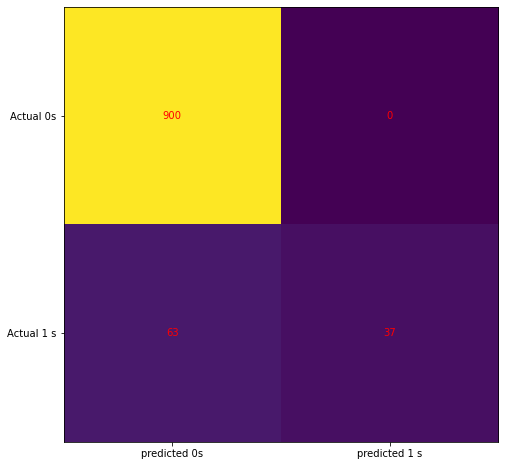

In [206]:
cm=confusion_matrix(y_test,y_pred_kn )

fig , ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s','predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1 s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha='center' , va='center', color= 'red' )
plt.show()        

In [185]:
K=20
Acc=np.zeros((K))
for i in range (1,K+1):
    clf_KN=KNeighborsClassifier(n_neighbors = i)
    clf_KN.fit(X_train,y_train)
    y_pred_kn=clf_KN.predict(X_test)
    Acc[i-1]=metrics.accuracy_score(y_test,y_pred_kn)
Acc    

array([0.949, 0.95 , 0.959, 0.948, 0.955, 0.951, 0.955, 0.95 , 0.952,
       0.948, 0.95 , 0.943, 0.944, 0.942, 0.943, 0.938, 0.94 , 0.937,
       0.939, 0.937])

In [186]:
print(np.max(Acc))
print(np.min(Acc))

0.959
0.937


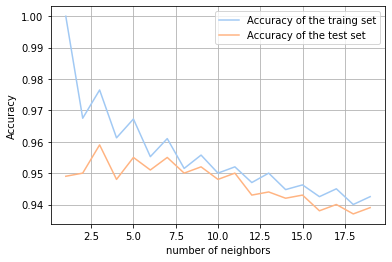

In [184]:
training_Acc=[]
test_Acc=[]
neighbors_setting=range(1,20)
for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors =n_neighbors )
    knn.fit(X_train,y_train.ravel())
    training_Acc.append(knn.score(X_train,y_train))
    test_Acc.append(knn.score(X_test,y_test))
    
plt.plot(neighbors_setting,training_Acc , label='Accuracy of the traing set')   
plt.plot(neighbors_setting,test_Acc , label='Accuracy of the test set') 
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.grid()
plt.legend()

In [192]:
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors": range(1,50)}
grid_kn=GridSearchCV(estimator=knn ,param_grid=parameters, scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
grid_kn.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [193]:
grid_kn.best_params_

{'n_neighbors': 3}

In [203]:
l_probs = [0 for _ in range(len(y_test))]
kn_probs = clf_KN.predict_proba(X_test)
kn_probs = kn_probs[:, 1]
l_auc = roc_auc_score(y_test, l_probs)
kn_auc = roc_auc_score(y_test, kn_probs)
print('knn : AUROC = %.3f' % (logis_auc))

knn : AUROC = 0.952


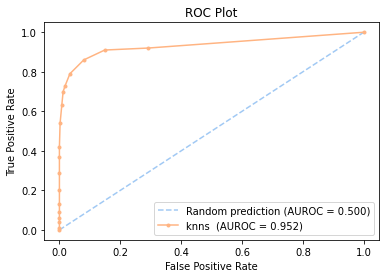

In [204]:
l_fpr, l_tpr, _ = roc_curve(y_test, l_probs)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_probs)
plt.plot(l_fpr, l_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % l_auc)
plt.plot(kn_fpr, kn_tpr, marker='.', label='knns  (AUROC = %0.3f)' % logis_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### predicting a customers by these pesicifition:
'Experience'=16 , 'Income'=30, 'Family'=3, 'CCAvg'=1.2, 'Education level'=3 , 'Mortgage'=0,
'Securities Account'=1 , 'CD Account'=0 , 'Online' = 1 , 'CreditCard'=1

In [197]:
##KNN
p1=clf_KN.predict([[16,30,3,1.2,3,0,1,0,1,1]])
p1

array([0], dtype=int64)

In [199]:
##Naive Bayes
p1=clf.predict([[16,30,3,1.2,3,0,1,0,1,1]])
p1

array([0], dtype=int64)

In [205]:
##logestic regression
p1=logreg.predict([[16,30,3,1.2,3,0,1,0,1,1]])
p1

array([1], dtype=int64)

### As we observed from reports and scores  from used algorithms, logestic regression was more succesful to predict better ,
